
# Project: Investigate a Dataset 

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

 I am going to analyse the data set of imdb. In this analyse, I want to focus on:
 
 - Which genres are most popular from year to year?
 

<a id='wrangling'></a>
## Data Wrangling

In the first step of Data wrangling, I will get an general idea of the data. I will check the numbers of columns and rows. I will also check the missing values and duplicates.

### General Properties

 - Import all the Packages that I will use

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

- Load the files and set my working directory

In [2]:
HOME = os.path.expanduser('~')
dir = os.path.join(HOME, 'repos/data_analyst_old/investigating_data_project/')
os.chdir(dir)
filename = os.path.join(dir,'tmdb-movies.csv')
df = pd.read_csv(filename)

- Print the head of the data

In [3]:
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


- Get the shape of the data. There are 10866 rows and 21 columns.

In [4]:
df.shape

(10866, 21)

- Get all the column names

In [5]:
list(df)

['id',
 'imdb_id',
 'popularity',
 'budget',
 'revenue',
 'original_title',
 'cast',
 'homepage',
 'director',
 'tagline',
 'keywords',
 'overview',
 'runtime',
 'genres',
 'production_companies',
 'release_date',
 'vote_count',
 'vote_average',
 'release_year',
 'budget_adj',
 'revenue_adj']

### Data Cleaning

I will remove duplicates and some rows with missing values, check the data type of each cell and remove '|' in some columns.

- Check the number of missing value by column. I found there were missing value here and there. But, most of them would not affect my analysis. So, I will leave them as is for now.

In [6]:
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

- Check the movies with the same movie title. I found some duplicates.

In [7]:
df.duplicated(subset = 'original_title')

0        False
1        False
2        False
3        False
4        False
5        False
6        False
7        False
8        False
9        False
10       False
11       False
12       False
13       False
14       False
15       False
16       False
17       False
18       False
19       False
20       False
21       False
22       False
23       False
24       False
25       False
26       False
27       False
28       False
29       False
         ...  
10836    False
10837    False
10838    False
10839    False
10840    False
10841    False
10842    False
10843    False
10844    False
10845    False
10846    False
10847    False
10848    False
10849     True
10850    False
10851    False
10852    False
10853     True
10854     True
10855    False
10856    False
10857    False
10858    False
10859    False
10860    False
10861    False
10862    False
10863    False
10864    False
10865    False
Length: 10866, dtype: bool

- Drop duplicates where the movies have the same title. I found the number of rows changed from 10866 to 10571.

In [8]:
df.drop_duplicates(subset= 'original_title', keep='first', inplace=True)

In [9]:
df.shape

(10571, 21)

- Check the data types of each cell

In [10]:
for column in list(df.columns.values):
    print(column + ':', type(df[column][0]))

id: <class 'numpy.int64'>
imdb_id: <class 'str'>
popularity: <class 'numpy.float64'>
budget: <class 'numpy.int64'>
revenue: <class 'numpy.int64'>
original_title: <class 'str'>
cast: <class 'str'>
homepage: <class 'str'>
director: <class 'str'>
tagline: <class 'str'>
keywords: <class 'str'>
overview: <class 'str'>
runtime: <class 'numpy.int64'>
genres: <class 'str'>
production_companies: <class 'str'>
release_date: <class 'str'>
vote_count: <class 'numpy.int64'>
vote_average: <class 'numpy.float64'>
release_year: <class 'numpy.int64'>
budget_adj: <class 'numpy.float64'>
revenue_adj: <class 'numpy.float64'>


- Remove '|' in the columns of 'cast' , 'genres' and 'production_companies'

In [11]:
df.cast = df.cast.str.split("|")
df.genres = df.genres.str.split("|")
df.production_companies = df.production_companies.str.split("|")

In [12]:
print(df.cast[0])
print(df.genres[0])
print(df.production_companies[0])

['Chris Pratt', 'Bryce Dallas Howard', 'Irrfan Khan', "Vincent D'Onofrio", 'Nick Robinson']
['Action', 'Adventure', 'Science Fiction', 'Thriller']
['Universal Studios', 'Amblin Entertainment', 'Legendary Pictures', 'Fuji Television Network', 'Dentsu']


<a id='eda'></a>
## Exploratory Data Analysis


### Research Question : Which genres are most popular from year to year?

- Create a new dataframe with only columns of 'id', 'genres', 'revenue_adj' and 'release_year'

In [13]:
df_genres = df[['id', 'genres', 'revenue_adj','release_year']].copy()

In [14]:
df_genres.head()

,id,genres,revenue_adj,release_year
0,135397,"[Action, Adventure, Science Fiction, Thriller]",1.392446e+09,2015
1,76341,"[Action, Adventure, Science Fiction, Thriller]",3.481613e+08,2015
2,262500,"[Adventure, Science Fiction, Thriller]",2.716190e+08,2015
3,140607,"[Action, Adventure, Science Fiction, Fantasy]",1.902723e+09,2015
4,168259,"[Action, Crime, Thriller]",1.385749e+09,2015


- Drop rows with null value in column 'genres'

In [15]:
df_genres.dropna(axis=0, how='any', subset=['genres'], inplace=True)


- Get the sum of revenue_adj of each genre every year

In [16]:
df_each_genre = (df_genres['genres']
                     .apply(pd.Series)
                     .stack()
                     .reset_index(level = 1, drop=True)
                     .to_frame('genre')
                     .join(df_genres[['id','revenue_adj','release_year']], how='left')
                     .reset_index(drop=True))


In [17]:
df_each_genre.head()

,genre,id,revenue_adj,release_year
0,Action,135397,1.392446e+09,2015
1,Adventure,135397,1.392446e+09,2015
2,Science Fiction,135397,1.392446e+09,2015
3,Thriller,135397,1.392446e+09,2015
4,Action,76341,3.481613e+08,2015


In [18]:
df_each_genre.groupby('release_year').agg({'revenue_adj': 'max', 'genre':'first'})

,revenue_adj,genre
release_year,,
1960,1.843242e+08,Action
1961,1.574815e+09,Adventure
1962,5.045914e+08,Adventure
1963,5.617734e+08,Action
1964,8.780804e+08,Adventure
1965,1.129535e+09,Adventure
1966,2.266436e+08,Animation
1967,7.294034e+08,Comedy
1968,3.555466e+08,Science Fiction


In [19]:
df_popular_genre = df_each_genre.groupby('release_year').agg({'revenue_adj': 'max', 'genre':'first'}).reset_index()

- The most popular genre of all time is adventure. This genre has generated most revenue for 17 years from the data set.

In [20]:
df_popular_genre['genre'].value_counts()

Adventure          17
Action             10
Drama               7
Science Fiction     6
Crime               3
Comedy              3
Animation           3
Horror              2
Mystery             1
Music               1
Romance             1
Thriller            1
Fantasy             1
Name: genre, dtype: int64

- Distribution of revenue of the most popular genre. There's big variation from year to year of the revenue.

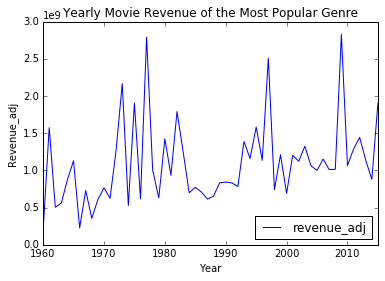

In [21]:
df_popular_genre.plot( x = 'release_year', y = 'revenue_adj')
plt.title("Yearly Movie Revenue of the Most Popular Genre")  
plt.xlabel("Year") 
plt.ylabel("Revenue_adj") 
plt.show() 

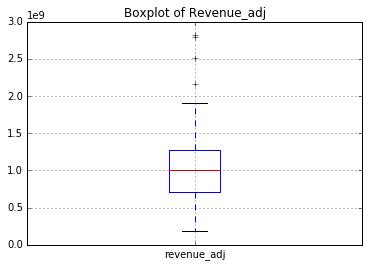

In [22]:
df_popular_genre.boxplot(column = 'revenue_adj')
plt.title("Boxplot of Revenue_adj")  
plt.show()

In [23]:
df_popular_genre['revenue_adj'].describe()

count    5.600000e+01
mean     1.090422e+09
std      5.653781e+08
min      1.843242e+08
25%      7.071561e+08
50%      1.007096e+09
75%      1.280231e+09
max      2.827124e+09
Name: revenue_adj, dtype: float64

<a id='conclusions'></a>
## Conclusions


In the analysis, I used many new techniques that I learnt from pandas such as stack, aggregation, working between different dataframes and etc. It was a good practice for me. 

The research is focused on analysing the most popular genre of the year. I assumed that the genre which generated most revenue was the most popular genre of the year. According to my analysis, 'adventure' is the most popular genre.This genre has generated most revenue for 17 years. 'Action' takes the second place, which has been the most popular for 10 years. Regarding the revenue generated from the most popular genre, there's big variation from year to year. 